# Problem 2: Newsgroups

The code for this single-layer perceptron can be found in `newsgroups.py`. The module `utils.py` contains helper functions to load the dataset, display progress bar, plot graphs, etc.

In [1]:
import sys
sys.path.append('../src/')
from newsgroups_v2 import *

---
## Building the Model

We initialize the parameters of the single-layer MLP.

In [2]:
# Model parameters
batch_size = 64
layers = [61188, 100, 20]
learning_rate = 1e-4
momentum = 0.9
eps = 1e-5
train_filename = "../data/newsgroups/matlab/train"
test_filename = "../data/newsgroups/matlab/test"
saved = "../data/newsgroups/saved/"
train_size = 11269
test_size = 7505

Next, we define a learning rate grid search for our model.

In [3]:
lr_search = [1e-2, 1e-3, 1e-4, 1e-5]
nb_epochs = 20

We can now load different datasets for each preprocessing methods. Since loading all three datasets at once requires a huge amount of memory, we load them sequentially by clearing out the memory inbetween each procedure.

### No Preprocessing

In [4]:
# Load dataset without any preprocessing (count vector)
train_data, valid_data, test_data = load_newsgroups(train_filename, test_filename, 
                                        layers[0], train_size, test_size, "count")
train_loader = DataLoader(train_data, batch_size=batch_size)
valid_loader = DataLoader(valid_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [5]:
# Compile and train model
train_acc = torch.zeros((len(lr_search), nb_epochs))
valid_acc = torch.zeros((len(lr_search), nb_epochs))

# Learning rate grid search
for i, lr in enumerate(lr_search):
    print("{}\nLearning rate = {:.5f}\n{}".format("="*30, lr, "-"*30))
    mlp_n = Newsgroups(layers, lr, momentum)
    t_acc, v_acc, _ = mlp_n.train(nb_epochs, train_loader, valid_loader)
    train_acc[i], valid_acc[i] = torch.FloatTensor(t_acc), torch.FloatTensor(v_acc)

Learning rate = 0.01000
------------------------------
Epoch 1/20
Avg loss: 2.8839 -- Train acc: 0.2718 -- Val acc: 0.2500
Epoch 2/20
Avg loss: 2.4064 -- Train acc: 0.3145 -- Val acc: 0.2791
Epoch 3/20
Avg loss: 2.0804 -- Train acc: 0.4726 -- Val acc: 0.4162
Epoch 4/20
Avg loss: 1.5783 -- Train acc: 0.5933 -- Val acc: 0.5204
Epoch 5/20
Avg loss: 1.3552 -- Train acc: 0.6619 -- Val acc: 0.5699
Epoch 6/20
Avg loss: 1.1157 -- Train acc: 0.6857 -- Val acc: 0.5781
Epoch 7/20
Avg loss: 0.8084 -- Train acc: 0.6579 -- Val acc: 0.5412
Epoch 8/20
Avg loss: 0.8722 -- Train acc: 0.6625 -- Val acc: 0.5382
Epoch 9/20
Avg loss: 0.7555 -- Train acc: 0.7815 -- Val acc: 0.6463
Epoch 10/20
Avg loss: 0.8315 -- Train acc: 0.7821 -- Val acc: 0.6311
Epoch 11/20
Avg loss: 0.5936 -- Train acc: 0.8467 -- Val acc: 0.6849
Epoch 12/20
Avg loss: 0.6652 -- Train acc: 0.7063 -- Val acc: 0.5534
Epoch 13/20
Avg loss: 0.5873 -- Train acc: 0.9084 -- Val acc: 0.7322
Epoch 14/20
Avg loss: 0.3768 -- Train acc: 0.9222 -- Val 

In [9]:
# Find best learning rate
best_lr_idx = valid_acc.max(1)[0].max(0)[1][0]
best_lr = lr_search[best_lr_idx]

# Train with best learning rate on test set
mlp_n = Newsgroups(layers, best_lr, momentum)
_, train_acc, test_acc = mlp_n.train(nb_epochs, train_loader, test_loader)

Epoch 1/20
Avg loss: 2.9685 -- Train acc: 0.1348 -- Val acc: 0.1214
Epoch 2/20
Avg loss: 2.6086 -- Train acc: 0.3174 -- Val acc: 0.2793
Epoch 3/20
Avg loss: 2.2065 -- Train acc: 0.4671 -- Val acc: 0.3914
Epoch 4/20
Avg loss: 1.7280 -- Train acc: 0.5803 -- Val acc: 0.4703
Epoch 5/20
Avg loss: 1.3919 -- Train acc: 0.6677 -- Val acc: 0.5306
Epoch 6/20
Avg loss: 1.2046 -- Train acc: 0.4572 -- Val acc: 0.3688
Epoch 7/20
Avg loss: 1.3288 -- Train acc: 0.5912 -- Val acc: 0.4543
Epoch 8/20
Avg loss: 0.8961 -- Train acc: 0.7541 -- Val acc: 0.5695
Epoch 9/20
Avg loss: 1.0303 -- Train acc: 0.7554 -- Val acc: 0.5650
Epoch 10/20
Avg loss: 0.8130 -- Train acc: 0.7551 -- Val acc: 0.5388
Epoch 11/20
Avg loss: 0.9261 -- Train acc: 0.7709 -- Val acc: 0.5628
Epoch 12/20
Avg loss: 1.0157 -- Train acc: 0.7158 -- Val acc: 0.5111
Epoch 13/20
Avg loss: 1.4560 -- Train acc: 0.7651 -- Val acc: 0.5568
Epoch 14/20
Avg loss: 0.7511 -- Train acc: 0.8722 -- Val acc: 0.6398
Epoch 15/20
Avg loss: 0.5838 -- Train acc: 

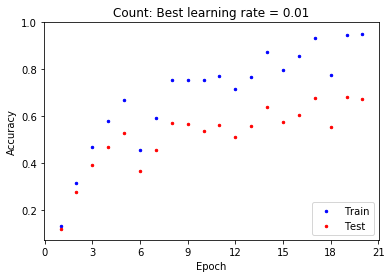

In [10]:
# Plot accuracy per epoch for this learning rate
plots_per_epoch([train_acc, test_acc], ["Train", "Test"], 
    "Accuracy", "Count: Best learning rate = {}".format(best_lr))

### TF-IDF

In [4]:
# Load dataset without any preprocessing (count vector)
train_data, valid_data, test_data = load_newsgroups(train_filename, test_filename, 
                                        layers[0], train_size, test_size, "tfidf")
train_loader = DataLoader(train_data, batch_size=batch_size)
valid_loader = DataLoader(valid_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [5]:
# Compile and train model
train_acc = torch.zeros((len(lr_search), nb_epochs))
valid_acc = torch.zeros((len(lr_search), nb_epochs))

# Learning rate grid search
for i, lr in enumerate(lr_search):
    print("{}\nLearning rate = {:.5f}\n{}".format("="*30, lr, "-"*30))
    mlp_n = Newsgroups(layers, lr, momentum)
    _, t_acc, v_acc = mlp_n.train(nb_epochs, train_loader, valid_loader)
    train_acc[i], valid_acc[i] = torch.FloatTensor(t_acc), torch.FloatTensor(v_acc)

Learning rate = 0.01000
------------------------------
Epoch 1/20
Avg loss: 3.0487 -- Train acc: 0.1185 -- Val acc: 0.1046
Epoch 2/20
Avg loss: 2.6192 -- Train acc: 0.3400 -- Val acc: 0.3038
Epoch 3/20
Avg loss: 2.4538 -- Train acc: 0.3210 -- Val acc: 0.2782
Epoch 4/20
Avg loss: 2.1881 -- Train acc: 0.2735 -- Val acc: 0.2461
Epoch 5/20
Avg loss: 2.1212 -- Train acc: 0.2125 -- Val acc: 0.1780
Epoch 6/20
Avg loss: 2.3180 -- Train acc: 0.1417 -- Val acc: 0.1293
Epoch 7/20
Avg loss: 2.5400 -- Train acc: 0.2990 -- Val acc: 0.2604
Epoch 8/20
Avg loss: 2.1663 -- Train acc: 0.4276 -- Val acc: 0.3663
Epoch 9/20
Avg loss: 2.0114 -- Train acc: 0.4020 -- Val acc: 0.3316
Epoch 10/20
Avg loss: 1.8047 -- Train acc: 0.5595 -- Val acc: 0.4592
Epoch 11/20
Avg loss: 1.7660 -- Train acc: 0.5549 -- Val acc: 0.4657
Epoch 12/20
Avg loss: 1.7398 -- Train acc: 0.4930 -- Val acc: 0.4010
Epoch 13/20
Avg loss: 1.4184 -- Train acc: 0.5790 -- Val acc: 0.4766
Epoch 14/20
Avg loss: 1.7643 -- Train acc: 0.5073 -- Val 

In [6]:
# Find best learning rate
best_lr_idx = valid_acc.max(1)[0].max(0)[1][0]
best_lr = lr_search[best_lr_idx]

# Train with best learning rate on test set
mlp_t = Newsgroups(layers, best_lr, momentum)
_, train_acc, test_acc = mlp_t.train(nb_epochs, train_loader, test_loader)

Epoch 1/20
Avg loss: 2.7291 -- Train acc: 0.4137 -- Val acc: 0.3853
Epoch 2/20
Avg loss: 1.8257 -- Train acc: 0.6611 -- Val acc: 0.5769
Epoch 3/20
Avg loss: 1.2885 -- Train acc: 0.7590 -- Val acc: 0.6278
Epoch 4/20
Avg loss: 0.9486 -- Train acc: 0.8479 -- Val acc: 0.6871
Epoch 5/20
Avg loss: 0.8060 -- Train acc: 0.8758 -- Val acc: 0.7009
Epoch 6/20
Avg loss: 0.6474 -- Train acc: 0.9065 -- Val acc: 0.7144
Epoch 7/20
Avg loss: 0.5097 -- Train acc: 0.9162 -- Val acc: 0.7137
Epoch 8/20
Avg loss: 0.4599 -- Train acc: 0.8935 -- Val acc: 0.6940
Epoch 9/20
Avg loss: 0.3998 -- Train acc: 0.9475 -- Val acc: 0.7262
Epoch 10/20
Avg loss: 0.3157 -- Train acc: 0.9639 -- Val acc: 0.7386
Epoch 11/20
Avg loss: 0.2689 -- Train acc: 0.9712 -- Val acc: 0.7387
Epoch 12/20
Avg loss: 0.3018 -- Train acc: 0.9611 -- Val acc: 0.7252
Epoch 13/20
Avg loss: 0.2161 -- Train acc: 0.9793 -- Val acc: 0.7450
Epoch 14/20
Avg loss: 0.1822 -- Train acc: 0.9835 -- Val acc: 0.7466
Epoch 15/20
Avg loss: 0.1620 -- Train acc: 

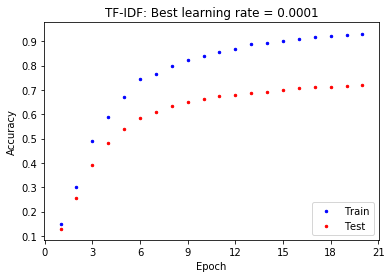

In [13]:
# Plot accuracy per epoch for best learning rate
plots_per_epoch([train_acc, test_acc], ["Train", "Test"], "Accuracy", 
    "TF-IDF: Best learning rate = {}".format(best_lr))

### Standardization

In [4]:
# Load dataset with standardization preprocessing, given epsilon
train_data, valid_data, test_data = load_newsgroups(train_filename, test_filename, 
                                layers[0], train_size, test_size, "stand", 1e-5)
train_loader = DataLoader(train_data, batch_size=batch_size)
valid_loader = DataLoader(valid_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [5]:
# Compile and train model
train_acc = torch.zeros((len(lr_search), nb_epochs))
valid_acc = torch.zeros((len(lr_search), nb_epochs))

# Learning rate grid search
for i, lr in enumerate(lr_search):
    print("{}\nLearning rate = {:.5f}\n{}".format("="*30, lr, "-"*30))
    mlp_s = Newsgroups(layers, lr, momentum)
    _, t_acc, v_acc = mlp_s.train(nb_epochs, train_loader, valid_loader)
    train_acc[i], valid_acc[i] = torch.FloatTensor(t_acc), torch.FloatTensor(v_acc)

Learning rate = 0.01000
------------------------------
Epoch 1/20
Avg loss: 1.2194 -- Train acc: 0.9847 -- Val acc: 0.8168
Epoch 2/20
Avg loss: 0.1846 -- Train acc: 0.9876 -- Val acc: 0.8138
Epoch 3/20
Avg loss: 0.1927 -- Train acc: 0.9791 -- Val acc: 0.7665
Epoch 4/20
Avg loss: 0.0709 -- Train acc: 0.9959 -- Val acc: 0.8164
Epoch 5/20
Avg loss: 0.0272 -- Train acc: 0.9968 -- Val acc: 0.8199
Epoch 6/20
Avg loss: 0.0193 -- Train acc: 0.9972 -- Val acc: 0.8207
Epoch 7/20
Avg loss: 0.0159 -- Train acc: 0.9973 -- Val acc: 0.8199
Epoch 8/20
Avg loss: 0.0135 -- Train acc: 0.9976 -- Val acc: 0.8207
Epoch 9/20
Avg loss: 0.0110 -- Train acc: 0.9976 -- Val acc: 0.8207
Epoch 10/20
Avg loss: 0.0102 -- Train acc: 0.9978 -- Val acc: 0.8216
Epoch 11/20
Avg loss: 0.0094 -- Train acc: 0.9978 -- Val acc: 0.8220
Epoch 12/20
Avg loss: 0.0088 -- Train acc: 0.9978 -- Val acc: 0.8216
Epoch 13/20
Avg loss: 0.0082 -- Train acc: 0.9980 -- Val acc: 0.8220
Epoch 14/20
Avg loss: 0.0077 -- Train acc: 0.9980 -- Val 

In [8]:
# Find best learning rate
best_lr_idx = valid_acc.max(1)[0].max(0)[1][0]
best_lr = lr_search[best_lr_idx]

# Train with best learning rate on test set
mlp_s = Newsgroups(layers, best_lr, momentum)
_, train_acc, test_acc = mlp_s.train(nb_epochs, train_loader, test_loader)

Epoch 1/20
Avg loss: 1.2188 -- Train acc: 0.9828 -- Val acc: 0.6891
Epoch 2/20
Avg loss: 0.2273 -- Train acc: 0.9713 -- Val acc: 0.6290
Epoch 3/20
Avg loss: 0.1956 -- Train acc: 0.9919 -- Val acc: 0.6651
Epoch 4/20
Avg loss: 0.0775 -- Train acc: 0.9961 -- Val acc: 0.6683
Epoch 5/20
Avg loss: 0.0279 -- Train acc: 0.9963 -- Val acc: 0.6695
Epoch 6/20
Avg loss: 0.0175 -- Train acc: 0.9968 -- Val acc: 0.6711
Epoch 7/20
Avg loss: 0.0139 -- Train acc: 0.9970 -- Val acc: 0.6721
Epoch 8/20
Avg loss: 0.0125 -- Train acc: 0.9973 -- Val acc: 0.6732
Epoch 9/20
Avg loss: 0.0121 -- Train acc: 0.9975 -- Val acc: 0.6733
Epoch 10/20
Avg loss: 0.0117 -- Train acc: 0.9976 -- Val acc: 0.6708
Epoch 11/20
Avg loss: 0.0114 -- Train acc: 0.9978 -- Val acc: 0.6725
Epoch 12/20
Avg loss: 0.0096 -- Train acc: 0.9978 -- Val acc: 0.6720
Epoch 13/20
Avg loss: 0.0087 -- Train acc: 0.9979 -- Val acc: 0.6727
Epoch 14/20
Avg loss: 0.0082 -- Train acc: 0.9979 -- Val acc: 0.6725
Epoch 15/20
Avg loss: 0.0078 -- Train acc: 

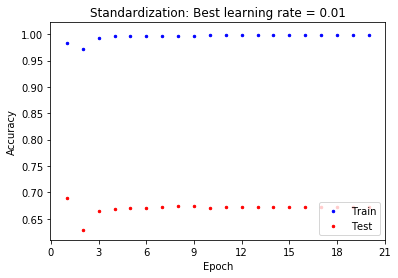

In [9]:
# Plot accuracy per epoch for best learning rate
plots_per_epoch([train_acc, test_acc], ["Train", "Test"], "Accuracy", 
    "Standardization: Best learning rate = {}".format(best_lr))

### Discussion

**(a)** Definitely, we have to use different learning rates for different preprocessing algorithms, as shown by the three plots above. By modifying the representation of the dataset, we are changing the way the data is fed into the network, which in turn affects how the gradient changes. This means that when we optimize, the weight manifolds we are exploring are different and so there is no reason why the optimal learning rate should be the same for different preprocessing procedures.

**(b)** If $\epsilon = 0$ then a word in the vocabulary that never appears in any document will cause a division by zero. In PyTorch, this gives `inf` entries in the training set which causes problem when updating the weights. In order to resolve this issue, we can remove all zero-contribution words in the vocab such that $\sigma_{\text{train}} \neq 0$ for all words.
 
**(c)** The tf-idf representation gives more "weight" to words that are rare. In some sense, tf-idf disregards words that have low impact (e.g. "the", "a", "and") in the classification because they are common, and identifies rare occurences.

---
## Variance in training

In [4]:
# Load dataset
train_data, valid_data, test_data = load_newsgroups(train_filename, test_filename, 
                                layers[0], train_size, test_size, "count")
learning_rate = 0.2

In [17]:
batch_size = 1
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [18]:
mlp = Newsgroups(layers, learning_rate, momentum)
train_loss, train_acc, test_acc = mlp.train(1, train_loader, test_loader, 5000)

Epoch 1/1
Update    0/5000 -- Cur loss: 2.9307
Update  100/5000 -- Cur loss: 3.3525
Update  200/5000 -- Cur loss: 3.8469
Update  300/5000 -- Cur loss: 3.2824
Update  400/5000 -- Cur loss: 2.3972
Update  500/5000 -- Cur loss: 3.0779
Update  600/5000 -- Cur loss: 4.2708
Update  700/5000 -- Cur loss: 5.2499
Update  800/5000 -- Cur loss: 4.4321
Update  900/5000 -- Cur loss: 2.9484
Update 1000/5000 -- Cur loss: 51.1168
Update 1100/5000 -- Cur loss: 3.2603
Update 1200/5000 -- Cur loss: 2.3804
Update 1300/5000 -- Cur loss: 3.4877
Update 1400/5000 -- Cur loss: 3.2075
Update 1500/5000 -- Cur loss: 3.6786
Update 1600/5000 -- Cur loss: 5.6481
Update 1700/5000 -- Cur loss: 4.7296
Update 1800/5000 -- Cur loss: 1.3532
Update 1900/5000 -- Cur loss: 3.1714
Update 2000/5000 -- Cur loss: 5.3211
Update 2100/5000 -- Cur loss: 3.3681
Update 2200/5000 -- Cur loss: 4.1217
Update 2300/5000 -- Cur loss: 3.6287
Update 2400/5000 -- Cur loss: 3.4092
Update 2500/5000 -- Cur loss: 4.8634
Update 2600/5000 -- Cur los

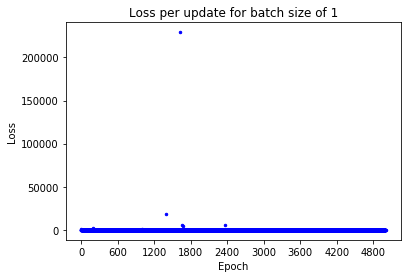

In [19]:
plot_per_epoch(train_loss, "Loss", "Loss per update for batch size of 1")

In [20]:
batch_size = 100
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [21]:
train_loss, train_acc, test_acc = mlp.train(100, train_loader, test_loader, 5000)

Epoch 1/100
Update    0/5000 -- Cur loss: 3.4958
Epoch 2/100
Update  100/5000 -- Cur loss: 2.9988
Epoch 3/100
Update  200/5000 -- Cur loss: 2.9979
Epoch 4/100
Update  300/5000 -- Cur loss: 2.9775
Epoch 5/100
Update  400/5000 -- Cur loss: 2.9451
Epoch 6/100
Update  500/5000 -- Cur loss: 2.9822
Epoch 7/100
Update  600/5000 -- Cur loss: 2.9790
Epoch 8/100
Update  700/5000 -- Cur loss: 3.0140
Epoch 9/100
Update  800/5000 -- Cur loss: 3.0062
Epoch 10/100
Update  900/5000 -- Cur loss: 3.0151
Epoch 11/100
Update 1000/5000 -- Cur loss: 2.9744
Epoch 12/100
Epoch 13/100
Update 1100/5000 -- Cur loss: 3.0103
Epoch 14/100
Update 1200/5000 -- Cur loss: 2.9681
Epoch 15/100
Update 1300/5000 -- Cur loss: 2.9833
Epoch 16/100
Update 1400/5000 -- Cur loss: 2.9818
Epoch 17/100
Update 1500/5000 -- Cur loss: 2.9749
Epoch 18/100
Update 1600/5000 -- Cur loss: 2.9829
Epoch 19/100
Update 1700/5000 -- Cur loss: 3.0052
Epoch 20/100
Update 1800/5000 -- Cur loss: 2.9503
Epoch 21/100
Update 1900/5000 -- Cur loss: 2.9

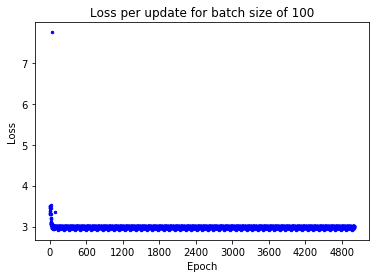

In [22]:
plot_per_epoch(train_loss, "Loss", "Loss per update for batch size of 100")

### Discussion

**(a)** With a batch size of 1, we are following the gradient given by a single example and therefore we can step in a wrong overall direction that can lead to an immense loss. This phenomenom is attenuated when the batch size is 100, since we are in some sense "averaging" over a bunch of gradient steps that overall follows the correct gradient direction.

**(b)** We can reduce the learning rate so that only small steps are taken. This way, if the batch size 1 gradient is not good representative of the true gradient on the complete manifold, then we will not step "too far" in the wrong direction.